In [1]:
# To Start
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
!pip install palmerpenguins
from palmerpenguins import load_penguins
import plotnine
from plotnine import *
import numpy as np
from numpy import *

In [3]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [4]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [5]:
X = penguins.drop(["bill_depth_mm"], axis = 1)
y= penguins['bill_depth_mm']

# a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

# removing year from standardization
no_year= X.select_dtypes(include=['float64', 'int']).columns.tolist()
no_year.remove('year')

enc = OneHotEncoder()

ct = ColumnTransformer(
    [("dummify_s", enc, ['species']),
     ("dummify_i", enc, ['island']),
     ("dummify_sex", enc, ['sex']),
     ("scale", StandardScaler(), no_year)],
    remainder='passthrough'
)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [6]:
from sklearn.metrics import mean_squared_error

Linear

In [7]:
# Linear

linear_pipeline = Pipeline([
    ('preprocessor', ct),
    ('linear_regressor', LinearRegression())
])

linear_pipeline.fit(X_train, y_train)

# Fit and Predict for Linear Regression
y_test_preds_lr = linear_pipeline.predict(X_test)

mse_lr_train = mean_squared_error(y_train, linear_pipeline.predict(X_train))
mse_lr_test = mean_squared_error(y_test, linear_pipeline.predict(X_test))

print(f"Linear Regression MSE train: {mse_lr_train}")
print(f"Linear Regression MSE test: {mse_lr_test}")

Linear Regression MSE train: 0.5925746575974323
Linear Regression MSE test: 0.6450654288485166


kNN

In [8]:
# kNN where k=3

knn_pipeline = Pipeline([
    ('preprocessor', ct),
    ('knn_regressor', KNeighborsRegressor(n_neighbors=3))
])

# Fit and Predict for kNN
knn_pipeline.fit(X_train, y_train)
y_test_preds_knn = knn_pipeline.predict(X_test)

mse_knn_train = mean_squared_error(y_train, knn_pipeline.predict(X_train))
mse_knn_test = mean_squared_error(y_test, knn_pipeline.predict(X_test))

print(f"kNN MSE train: {mse_knn_train}")
print(f"kNN MSE test: {mse_knn_test}")

kNN MSE train: 0.37723893065998315
kNN MSE test: 0.8166003316749586


In [9]:
# kNN where k=100

knn_pipeline2 = Pipeline([
    ('preprocessor', ct),
    ('knn_regressor', KNeighborsRegressor(n_neighbors=100))
])

# Fit and Predict for kNN
knn_pipeline2.fit(X_train, y_train)
y_test_preds_knn2 = knn_pipeline2.predict(X_test)

mse_knn_train2 = mean_squared_error(y_train, knn_pipeline2.predict(X_train))
mse_knn_test2 = mean_squared_error(y_test, knn_pipeline2.predict(X_test))

print(f"kNN MSE train: {mse_knn_train2}")
print(f"kNN MSE test: {mse_knn_test2}")

kNN MSE train: 1.4118988947368423
kNN MSE test: 1.6407127164179103


In [10]:
# kNN where k=250

knn_pipeline3 = Pipeline([
    ('preprocessor', ct),
    ('knn_regressor', KNeighborsRegressor(n_neighbors=250))
])

# Fit and Predict for kNN
knn_pipeline3.fit(X_train, y_train)
y_test_preds_knn3 = knn_pipeline3.predict(X_test)

mse_knn_train3 = mean_squared_error(y_train, knn_pipeline3.predict(X_train))
mse_knn_test3 = mean_squared_error(y_test, knn_pipeline3.predict(X_test))

print(f"kNN MSE train: {mse_knn_train3}")
print(f"kNN MSE test: {mse_knn_test3}")

kNN MSE train: 3.652502883007519
kNN MSE test: 4.275500293731342


Decision Trees

In [11]:
# Decision Tree

tree_pipeline = Pipeline([
    ('preprocessor', ct),
    ('knn_regressor', DecisionTreeRegressor(max_depth=3, random_state=18))
])

# Fit and Predict for kNN
tree_pipeline.fit(X_train, y_train)
y_test_preds_tree = tree_pipeline.predict(X_test)

mse_dt_train = mean_squared_error(y_train, tree_pipeline.predict(X_train))
mse_dt_test = mean_squared_error(y_test, tree_pipeline.predict(X_test))

print(f"Tree MSE train: {mse_dt_train}")
print(f"Tree MSE test: {mse_dt_test}")

Tree MSE train: 0.5695483553906466
Tree MSE test: 0.8151338349721292


In [12]:
# Decision Tree

tree_pipeline2 = Pipeline([
    ('preprocessor', ct),
    ('knn_regressor', DecisionTreeRegressor(max_depth=6, random_state=18))
])

# Fit and Predict for the Decision Tree
tree_pipeline2.fit(X_train, y_train)
y_test_preds_tree = tree_pipeline2.predict(X_test)

mse_dt_train2 = mean_squared_error(y_train, tree_pipeline2.predict(X_train))
mse_dt_test2 = mean_squared_error(y_test, tree_pipeline2.predict(X_test))

print(f"Tree MSE train: {mse_dt_train2}")
print(f"Tree MSE test: {mse_dt_test2}")

Tree MSE train: 0.31860316792922155
Tree MSE test: 1.0816084258608951


In [13]:
# Decision Tree

tree_pipeline3 = Pipeline([
    ('preprocessor', ct),
    ('knn_regressor', DecisionTreeRegressor(max_depth=10, random_state=18))
])

# Fit and Predict for the Decision Tree
tree_pipeline3.fit(X_train, y_train)
y_test_preds_tree = tree_pipeline3.predict(X_test)

mse_dt_train3 = mean_squared_error(y_train, tree_pipeline3.predict(X_train))
mse_dt_test3 = mean_squared_error(y_test, tree_pipeline3.predict(X_test))

print(f"Tree MSE train: {mse_dt_train3}")
print(f"Tree MSE test: {mse_dt_test3}")

Tree MSE train: 0.056414384174722505
Tree MSE test: 1.4024570015568418


Plot of Complexity

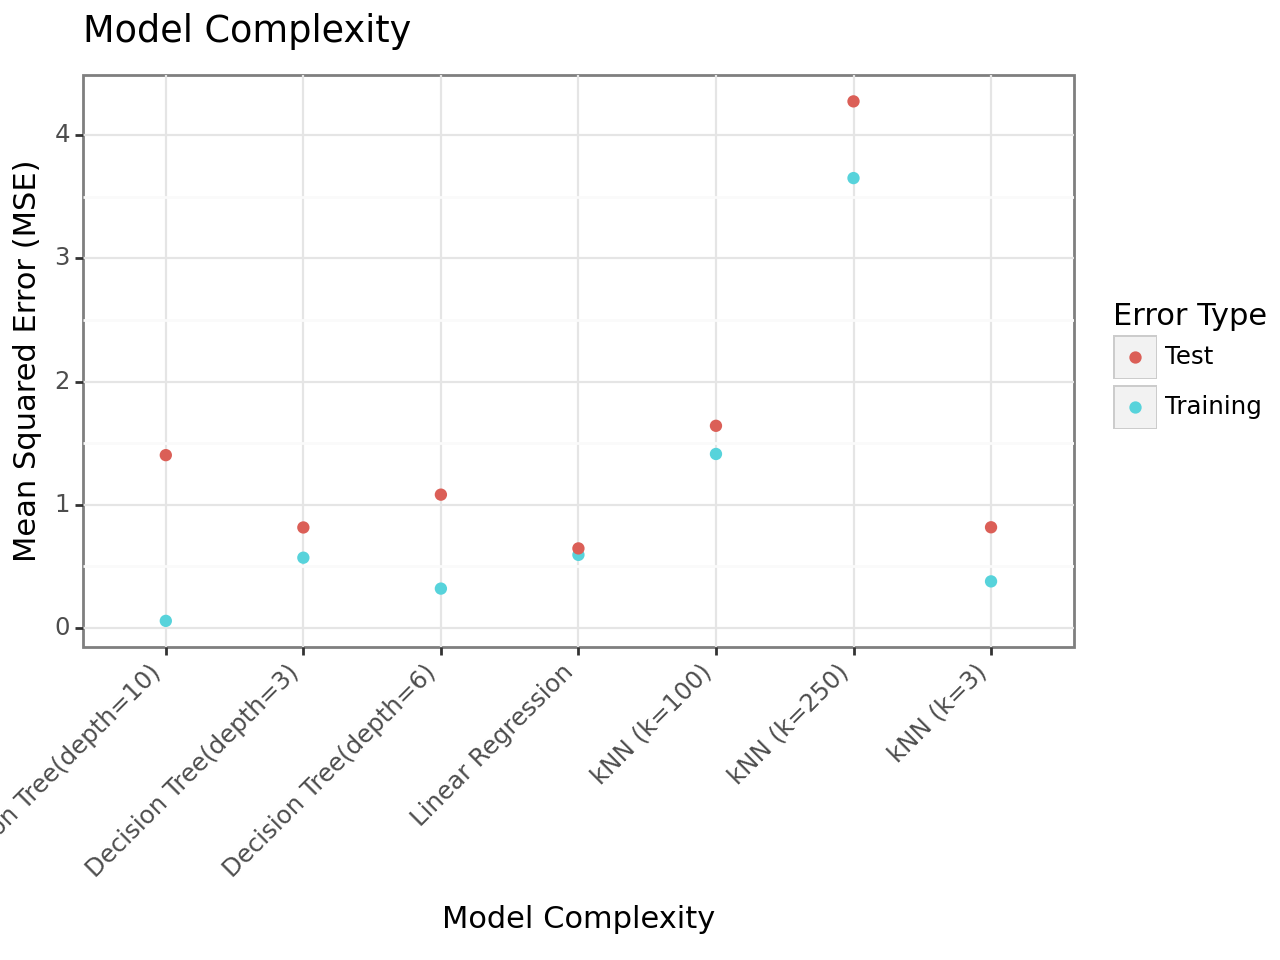

<Figure Size: (640 x 480)>

In [14]:
# Creating the MSE data frame
data = pd.DataFrame({
    'Model': ['Linear Regression', 'Linear Regression', 'kNN (k=3)', 'kNN (k=3)', 'kNN (k=100)', 'kNN (k=100)', 'kNN (k=250)', 'kNN (k=250)', 'Decision Tree(depth=3)', 'Decision Tree(depth=3)', 'Decision Tree(depth=6)', 'Decision Tree(depth=6)', 'Decision Tree(depth=10)', 'Decision Tree(depth=10)'],
    'Error Type': ['Training', 'Test', 'Training', 'Test', 'Training', 'Test', 'Training', 'Test', 'Training', 'Test','Training', 'Test', 'Training', 'Test'],
    'MSE': [mse_lr_train, mse_lr_test, mse_knn_train, mse_knn_test, mse_knn_train2, mse_knn_test2, mse_knn_train3, mse_knn_test3, mse_dt_train, mse_dt_test, mse_dt_train2, mse_dt_test2, mse_dt_train3, mse_dt_test3]
})

plot1 = (ggplot(data=data, mapping=aes(x='Model', y='MSE', color='Error Type'))
        + geom_point()
        + labs(title="Model Complexity", x="Model Complexity", y="Mean Squared Error (MSE)")
        + theme_bw()
        + theme(axis_text_x=element_text(angle=45, hjust=1))
         )

plot1


A smaller gap between training and test errors indicates better generalization, while a large gap can indicate overfitting (especially if the training error is much lower). Therefore, according to the plot, Linear Regression, kNN with a smaller k value, and the decision tree with no specific threshold given are overfit. The kNN with a larger k value has a small gap between test and train MSE values so it is better for generalization.

The linear regression model appears to be the best predicting model as it both has no overfitting issue and has smaller MSE values.

Understanding of Model Complexity
- kNN: The complexity in kNN is inversely related to the value of k. A smaller k (like 3) means a more complex model, while a larger k (like 250) means a simpler model.
- Decision Tree: Complexity can be related to the depth of the tree. A deeper tree is more complex.
- Linear Regression: This model's complexity is typically constant in its basic form since it does not have hyperparameters like k or tree depth that significantly alter its complexity.